# Querying the Austin, Texas OpenStreetMap Database

In [1]:
import sqlite3
from pprint import pprint

In [2]:
sqlite_file = "atx_osm.db"

In [3]:
conn = sqlite3.connect(sqlite_file)

In [4]:
cur = conn.cursor()

SQL queries below were mostly obtained from sample project:

https://gist.github.com/carlward/54ec1c91b62a5f911c42

## List of cities

Cities from nodes_tags table

In [5]:
cities = cur.execute("""SELECT tags.value, COUNT(*) as count
                        FROM (SELECT * FROM nodes_tags
                              UNION ALL 
                              SELECT * FROM ways_tags) tags 
                        WHERE tags.key = 'city' 
                        GROUP BY tags.value 
                        ORDER By count DESC""").fetchall()

In [6]:
cities

[(u'Austin', 3068),
 (u'Round Rock', 113),
 (u'Kyle', 64),
 (u'Cedar Park', 43),
 (u'Pflugerville', 37),
 (u'Leander', 33),
 (u'Buda', 26),
 (u'Georgetown', 17),
 (u'Dripping Springs', 13),
 (u'West Lake Hills', 12),
 (u'Bastrop', 9),
 (u'Elgin', 9),
 (u'Lakeway', 9),
 (u'Wimberley', 8),
 (u'Taylor', 7),
 (u'Bee Cave', 6),
 (u'Del Valle', 5),
 (u'Manor', 5),
 (u'Manchaca', 4),
 (u'Cedar Creek', 3),
 (u'Hutto', 3),
 (u'Spicewood', 3),
 (u'Creedmoor', 2),
 (u'Lago Vista', 2),
 (u'San Marcos', 2),
 (u'Sunset Valley', 2),
 (u'Webberville', 2),
 (u'Driftwood', 1),
 (u'Jonestown', 1),
 (u'Lost Pines', 1),
 (u'Manchacha', 1),
 (u'Maxwell', 1),
 (u'Smithville', 1)]

## Postcode

In [7]:
postcode = cur.execute("""SELECT tags.value, COUNT(*) as count
                          FROM (SELECT * FROM nodes_tags
                                UNION ALL SELECT * FROM ways_tags) tags 
                          WHERE tags.key = 'postcode' 
                          GROUP BY tags.value 
                          ORDER By count DESC""").fetchall()

In [8]:
postcode

[(u'78645', 10882),
 (u'78734', 5606),
 (u'78653', 3543),
 (u'78660', 3516),
 (u'78669', 3189),
 (u'78641', 2863),
 (u'78704', 2488),
 (u'78746', 2446),
 (u'78759', 2092),
 (u'78738', 1939),
 (u'78748', 1915),
 (u'78723', 1896),
 (u'78703', 1845),
 (u'78617', 1829),
 (u'78701', 1726),
 (u'78724', 1680),
 (u'78731', 1680),
 (u'78745', 1592),
 (u'78744', 1525),
 (u'78758', 1419),
 (u'78620', 1323),
 (u'78732', 1307),
 (u'78754', 1289),
 (u'78741', 1286),
 (u'78747', 1277),
 (u'78705', 1237),
 (u'78750', 1212),
 (u'78733', 1199),
 (u'78757', 1160),
 (u'78735', 1067),
 (u'78737', 1053),
 (u'78753', 1040),
 (u'78702', 1027),
 (u'78725', 1027),
 (u'78736', 1009),
 (u'78730', 938),
 (u'78749', 833),
 (u'78751', 813),
 (u'78728', 787),
 (u'78739', 786),
 (u'78721', 756),
 (u'78717', 716),
 (u'78652', 712),
 (u'78610', 685),
 (u'78621', 645),
 (u'78752', 610),
 (u'78729', 599),
 (u'78727', 560),
 (u'78756', 534),
 (u'78719', 475),
 (u'78613', 431),
 (u'78654', 412),
 (u'78726', 392),
 (u'78664'

We can see that there are three "None" values. Determination of the missing postcodes:

In [9]:
missing_postcodes = cur.execute("""SELECT * 
                                   FROM (SELECT * FROM nodes_tags
                                         UNION ALL 
                                         SELECT * FROM ways_tags) tags 
                                   WHERE tags.key = 'postcode' 
                                   AND tags.value = 'None'""").fetchall()

In [10]:
missing_postcodes

[(2152207067, u'postcode', u'None', u'addr'),
 (247506590, u'postcode', u'None', u'addr'),
 (383791236, u'postcode', u'None', u'addr')]

##### Looking for info on id 2152207067:

In [12]:
cur.execute("""SELECT tags.value 
             FROM (SELECT * FROM nodes_tags
             UNION ALL 
             SELECT * FROM ways_tags) tags 
             WHERE tags.key = 'city'
             AND tags.id = 2152207067""")

In [13]:
missing_postcode1 = cur.fetchall()
missing_postcode1

[]

In [14]:
cur.execute("""SELECT * 
             FROM (SELECT * FROM nodes_tags
             UNION ALL 
             SELECT * FROM ways_tags) tags
             WHERE tags.id = 2152207067""")
missing_postcode1_info = cur.fetchall()
missing_postcode1_info

[(2152207067, u'name', u'Nyle Maxwell - Taylor', u'regular'),
 (2152207067, u'shop', u'car', u'regular'),
 (2152207067, u'website', u'www.nylemaxwellcjd.com', u'regular'),
 (2152207067, u'street', u'United States Highway 79', u'addr'),
 (2152207067, u'postcode', u'None', u'addr')]

The missing info for id 2152207067 is then a car dealership address. Searching on the internet for www.nylemaxwellcjd.com, we find that the address is:

14150 UNITED STATES HIGHWAY 79 TAYLOR,	TX	76574

##### Determining the postcode for id 247506590:

In [15]:
cur.execute("""SELECT * 
             FROM (SELECT * FROM nodes_tags
             UNION ALL 
             SELECT * FROM ways_tags) tags
             WHERE tags.id = 247506590""")
missing_postcode2_info = cur.fetchall()
missing_postcode2_info

[(247506590, u'name', u'Concordia University Texas', u'regular'),
 (247506590, u'phone', u'512-313-3000', u'regular'),
 (247506590, u'amenity', u'university', u'regular'),
 (247506590, u'website', u'http://www.concordia.edu', u'regular'),
 (247506590, u'operator', u'Concordia University System', u'regular'),
 (247506590, u'city', u'Austin', u'addr'),
 (247506590, u'wikipedia', u'en:Concordia University Texas', u'regular'),
 (247506590, u'street', u'Concordia University Drive', u'addr'),
 (247506590, u'postcode', u'None', u'addr'),
 (247506590, u'housenumber', u'11400', u'addr')]

Searching for the address shown in the info above using Google Maps, we now know that the postcode is 78726.

https://goo.gl/maps/Bmh7gNoRLGu

##### Determination of postcode for id 383791236:

In [16]:
cur.execute("""SELECT * 
             FROM (SELECT * FROM nodes_tags
             UNION ALL 
             SELECT * FROM ways_tags) tags
             WHERE tags.id = 383791236""")
missing_postcode3_info = cur.fetchall()
missing_postcode3_info

[(383791236, u'building', u'house', u'regular'),
 (383791236, u'city', u'Austin', u'addr'),
 (383791236, u'street', u'Elderberry Road', u'addr'),
 (383791236, u'postcode', u'None', u'addr'),
 (383791236, u'housenumber', u'282', u'addr')]

Searching for the address above on Google maps yield a postcode of 78745.

## Number of nodes:

In [17]:
cur.execute("SELECT COUNT(*) FROM nodes")
nodes = cur.fetchall()
nodes

[(6356394,)]

This value is the same as the one obtained from the exploration of dataset using xml.etree.cElementTree module of Python (see p3_wrangle_openstreetmap_1.ipynb, High Level Tags)

## Number of ways:

In [18]:
cur.execute("SELECT COUNT(*) FROM ways")
ways = cur.fetchall()
ways

[(666390,)]

This is also the same number obtained from the the ElementTree module in Python (p3_wrangle_openstreetmap_1.ipynb, High Level Tags).

## Number of unique users

In [19]:
cur.execute("""SELECT COUNT(DISTINCT(e.uid))
             FROM (SELECT uid from nodes UNION ALL SELECT uid FROM ways) e""")
users = cur.fetchall()
users

[(1146,)]

This number is lower than the one obtained using the ElementTree module in the exploration of the xml osm (1155 users, p3_wrangle_openstreetmap_1.ipynb, Exploring Users). This might be because when the csv files were created, the key values with problematic characters were removed, along with the rest of the record containing that value.

## Top 10 contributing users

In [20]:
cur.execute("""SELECT e.user, COUNT(*) as num 
             FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e 
             GROUP BY e.user 
             ORDER BY num DESC 
             LIMIT 10""")

In [21]:
top10contributors = cur.fetchall()
top10contributors

[(u'patisilva_atxbuildings', 2743705),
 (u'ccjjmartin_atxbuildings', 1300514),
 (u'ccjjmartin__atxbuildings', 940070),
 (u'wilsaj_atxbuildings', 359124),
 (u'jseppi_atxbuildings', 300983),
 (u'woodpeck_fixbot', 223425),
 (u'kkt_atxbuildings', 157847),
 (u'lyzidiamond_atxbuildings', 156383),
 (u'richlv', 50212),
 (u'johnclary_axtbuildings', 48232)]

##### Using pandas to explore contributors:

In [22]:
contributions = cur.execute("""SELECT e.user, COUNT(*) as num 
                             FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e 
                             GROUP BY e.user 
                             ORDER BY num DESC""").fetchall()

In [23]:
import pandas as pd

In [24]:
contributions_df = pd.DataFrame(contributions)
contributions_df.head(10)

,0,1
0,patisilva_atxbuildings,2743705
1,ccjjmartin_atxbuildings,1300514
2,ccjjmartin__atxbuildings,940070
3,wilsaj_atxbuildings,359124
4,jseppi_atxbuildings,300983
5,woodpeck_fixbot,223425
6,kkt_atxbuildings,157847
7,lyzidiamond_atxbuildings,156383
8,richlv,50212
9,johnclary_axtbuildings,48232


In [25]:
contributions_df['users'] = contributions_df[0]

In [26]:
contributions_df['count'] = contributions_df[1]

In [27]:
del contributions_df[0]

In [28]:
del contributions_df[1]

In [29]:
contributions_df.head(10)

,users,count
0,patisilva_atxbuildings,2743705
1,ccjjmartin_atxbuildings,1300514
2,ccjjmartin__atxbuildings,940070
3,wilsaj_atxbuildings,359124
4,jseppi_atxbuildings,300983
5,woodpeck_fixbot,223425
6,kkt_atxbuildings,157847
7,lyzidiamond_atxbuildings,156383
8,richlv,50212
9,johnclary_axtbuildings,48232


## Number of users having only one contribution:

Using pandas instead of sqlite database

In [34]:
from time import time

In [35]:
t0 = time()
print len(contributions_df[contributions_df['count'] == 1])
print 'Processing time: ', round(time() - t0, 3), "s"

256
Processing time:  0.002 s


Using sqlite:

In [36]:
t0 = time()
number = cur.execute("""SELECT COUNT(*) 
                      FROM 
                          (SELECT e.user, COUNT(*) as num 
                           FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e 
                           GROUP BY e.user 
                           HAVING num=1) u""").fetchall()
print number
print 'Processing time: ', round(time() - t0, 3), "s"

[(256,)]
Processing time:  13.476 s


## Popular amenities

In [37]:
amenities = cur.execute("""SELECT value, COUNT(*) as num 
                           FROM nodes_tags 
                           WHERE key = 'amenity' 
                           GROUP BY value 
                           ORDER BY num DESC""").fetchall()

In [38]:
amenities_df = pd.DataFrame(amenities)

In [39]:
amenities_df['amenity'] = amenities_df[0]
amenities_df['count'] = amenities_df[1]
del amenities_df[0]
del amenities_df[1]
amenities_df.head(10)

,amenity,count
0,restaurant,601
1,waste_basket,598
2,place_of_worship,420
3,fast_food,387
4,bench,359
5,fuel,241
6,school,219
7,bar,120
8,cafe,120
9,pharmacy,88


In [40]:
amenities_df[amenities_df['count'] == 1]

,amenity,count
54,Condominium complex,1
55,Fine Wine & Liquor,1
56,Flag,1
57,amusement_park,1
58,boat_rental,1
59,community_center,1
60,courthouse,1
61,diving_board,1
62,dojo,1
63,food_court,1


## Most popular cuisines

In [41]:
cuisines = cur.execute("""SELECT nodes_tags.value, COUNT(*) as num 
                        FROM nodes_tags 
                            JOIN (SELECT DISTINCT(id) FROM nodes_tags 
                                  WHERE value = 'restaurant') i 
                            ON nodes_tags.id=i.id 
                        WHERE nodes_tags.key='cuisine' 
                        GROUP BY nodes_tags.value 
                        ORDER BY num DESC""").fetchall()

In [42]:
cuisines

[(u'mexican', 60),
 (u'american', 25),
 (u'pizza', 25),
 (u'chinese', 20),
 (u'indian', 15),
 (u'italian', 15),
 (u'asian', 14),
 (u'thai', 14),
 (u'sandwich', 13),
 (u'sushi', 12),
 (u'burger', 11),
 (u'regional', 10),
 (u'japanese', 8),
 (u'barbecue', 6),
 (u'vietnamese', 5),
 (u'chicken', 3),
 (u'greek', 3),
 (u'ice_cream', 3),
 (u'korean', 3),
 (u'steak_house', 3),
 (u'french', 2),
 (u'mediterranean', 2),
 (u'salad', 2),
 (u'tex-mex', 2),
 (u'American, home cooking', 1),
 (u'Argentinian', 1),
 (u'Asian_Fusion', 1),
 (u'BBQ', 1),
 (u'Bar-B-Q', 1),
 (u'Cuban', 1),
 (u'Greek-centric_Mediterranean_cuisine', 1),
 (u'Greek/Mediteranian', 1),
 (u'ICe_cream', 1),
 (u'Ice_cream', 1),
 (u'Jamaican,_Cuban', 1),
 (u'Mexican_Korean', 1),
 (u'Moroccan', 1),
 (u'Surf_&_Turf', 1),
 (u'Tacos,_coffee', 1),
 (u'Tex-Mex', 1),
 (u'Texas Style BBQ', 1),
 (u'american,wings', 1),
 (u'breakfast', 1),
 (u'cajun', 1),
 (u'colombian', 1),
 (u'el_salvadorian', 1),
 (u'ethiopian', 1),
 (u'indonesian', 1),
 (u'n

As can be seen above, cuisine values need to be cleaned as well. 

## Location of different restaurants

In [43]:
cuisine_loc = cur.execute("""SELECT b.id, b.value, nodes.lat, nodes.lon 
                             FROM (SELECT * FROM nodes_tags UNION ALL SELECT * FROM ways_tags) b
                                   JOIN nodes ON b.id = nodes.id 
                             WHERE b.key = 'cuisine'""").fetchall()

In [44]:
cuisine_loc

[(280232008,
  u'burger;sandwich;hotdog;grill;irish;fish_and_chips;vegetarian;mexican',
  30.2925357,
  -97.735633),
 (336647359, u'asian', 30.3150638, -97.7344909),
 (338450996, u'coffee_shop', 30.268574, -97.7423667),
 (432202212, u'japanese', 30.3565169, -97.7473856),
 (432202995, u'chinese', 30.3565687, -97.7473599),
 (437279354, u'mexican', 30.2800588, -97.7594781),
 (437379736, u'tex-mex', 30.2828378, -97.7755976),
 (457485574, u'american', 30.2794133, -97.7600581),
 (472242349, u'ice_cream', 30.230688, -97.7998856),
 (480598791, u'coffee_shop', 30.4019522, -97.7264133),
 (530782913, u'burger', 30.3321885, -97.7403355),
 (530785813, u'mexican', 30.3415445, -97.7391338),
 (530786430, u'American, home cooking', 30.3437964, -97.7379751),
 (530930090, u'regional', 30.3080182, -97.7504833),
 (532440834, u'mexican', 30.323403, -97.739207),
 (534454296, u'thai', 30.2967459, -97.7416594),
 (537477734, u'chinese', 30.432584, -97.7714049),
 (538135772, u'american', 30.390988, -97.7479611),

In [45]:
len(cuisine_loc)

514

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

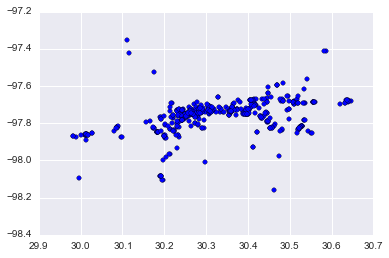

In [48]:
plt.scatter([x[2] for x in cuisine_loc], [y[3] for y in cuisine_loc])

To change the size of the figure:

https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/

In [49]:
fig_size = plt.rcParams["figure.figsize"]
fig_size

[6.0, 4.0]

In [50]:
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

Replotting the location of all the restaurants:

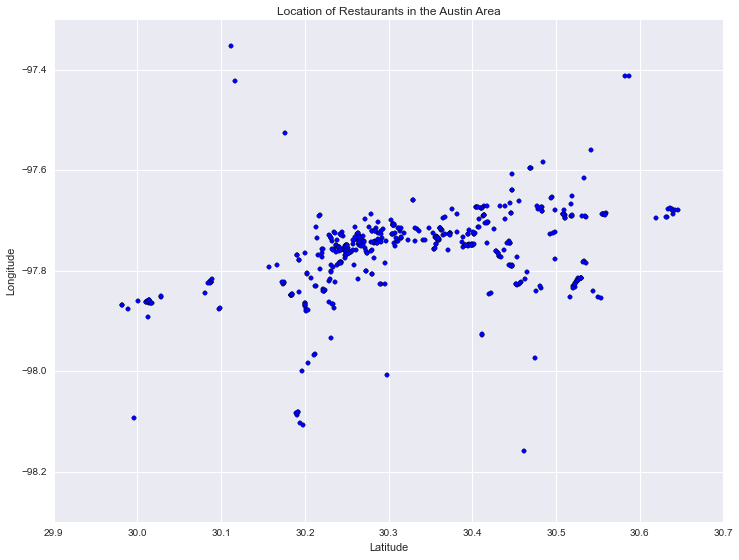

In [51]:
plt.scatter([x[2] for x in cuisine_loc], [y[3] for y in cuisine_loc])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Restaurants in the Austin Area')

Location of coffee shops:

In [52]:
coffee_loc = cur.execute("""SELECT b.id, b.value, nodes.lat, nodes.lon 
                            FROM (SELECT * FROM nodes_tags UNION ALL SELECT * FROM ways_tags) b
                                  JOIN nodes ON b.id = nodes.id 
                            WHERE b.value = 'coffee_shop'""").fetchall()

In [53]:
coffee_loc

[(338450996, u'coffee_shop', 30.268574, -97.7423667),
 (480598791, u'coffee_shop', 30.4019522, -97.7264133),
 (564537851, u'coffee_shop', 30.1852296, -97.8471973),
 (573843025, u'coffee_shop', 30.3185317, -97.7245043),
 (1431494369, u'coffee_shop', 30.3138337, -97.7199873),
 (1489699385, u'coffee_shop', 30.266973, -97.7456939),
 (1539153968, u'coffee_shop', 30.2649108, -97.746939),
 (1674064437, u'coffee_shop', 30.359865, -97.7379073),
 (1743142320, u'coffee_shop', 30.4188075, -97.7027767),
 (2098735206, u'coffee_shop', 30.481681, -97.83424),
 (2352597263, u'coffee_shop', 30.3546718, -97.7563416),
 (2492922372, u'coffee_shop', 30.2732409, -97.8005516),
 (2970345629, u'coffee_shop', 30.3059108, -97.7079434),
 (3027587146, u'coffee_shop', 30.2221147, -97.8373142),
 (3181780243, u'coffee_shop', 30.2954347, -97.7842475),
 (3181780246, u'coffee_shop', 30.3106073, -97.7400068),
 (3190877898, u'coffee_shop', 30.2326024, -97.7562269),
 (3513739093, u'coffee_shop', 30.5269536, -97.8144295),
 (3

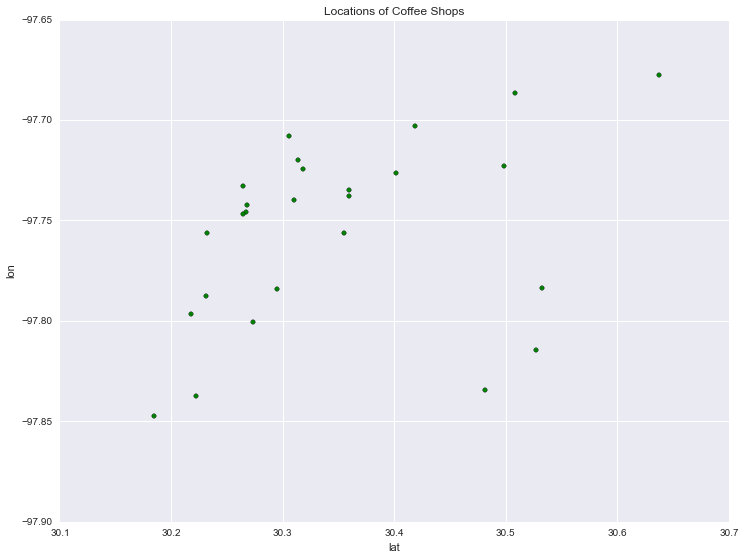

In [54]:
plt.scatter([x[2] for x in coffee_loc], [y[3] for y in coffee_loc], c='green')
plt.xlabel('lat')
plt.ylabel('lon')
plt.title('Locations of Coffee Shops')

Overlapping the two:

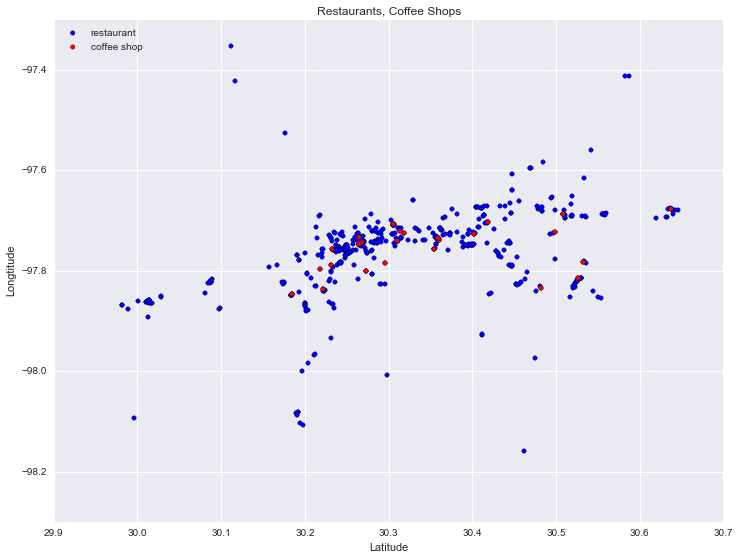

In [62]:
plt.scatter([x[2] for x in cuisine_loc], [y[3] for y in cuisine_loc], c='blue', label="restaurant")
plt.scatter([x[2] for x in coffee_loc], [y[3] for y in coffee_loc], c='red', label="coffee shop")
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.title('Restaurants, Coffee Shops')
plt.legend(loc=2)

In [61]:
conn.close()

Plotting would have been more successful if the cuisine values have been cleaned.

### Fraction of mexican restaurants:

In [65]:
cuisine_df = pd.DataFrame(cuisine_loc)
cuisine_df.head(10)

,0,1,2,3
0,280232008,burger;sandwich;hotdog;grill;irish;fish_and_ch...,30.292536,-97.735633
1,336647359,asian,30.315064,-97.734491
2,338450996,coffee_shop,30.268574,-97.742367
3,432202212,japanese,30.356517,-97.747386
4,432202995,chinese,30.356569,-97.747360
5,437279354,mexican,30.280059,-97.759478
6,437379736,tex-mex,30.282838,-97.775598
7,457485574,american,30.279413,-97.760058
8,472242349,ice_cream,30.230688,-97.799886
9,480598791,coffee_shop,30.401952,-97.726413


In [66]:
cuisine_df['value'] = cuisine_df[1]

In [67]:
del cuisine_df[1]
del cuisine_df[2]
del cuisine_df[3]
cuisine_df['id'] = cuisine_df[0]
del cuisine_df[0]

In [69]:
cuisine_df.head()

,value,id
0,burger;sandwich;hotdog;grill;irish;fish_and_ch...,280232008
1,asian,336647359
2,coffee_shop,338450996
3,japanese,432202212
4,chinese,432202995


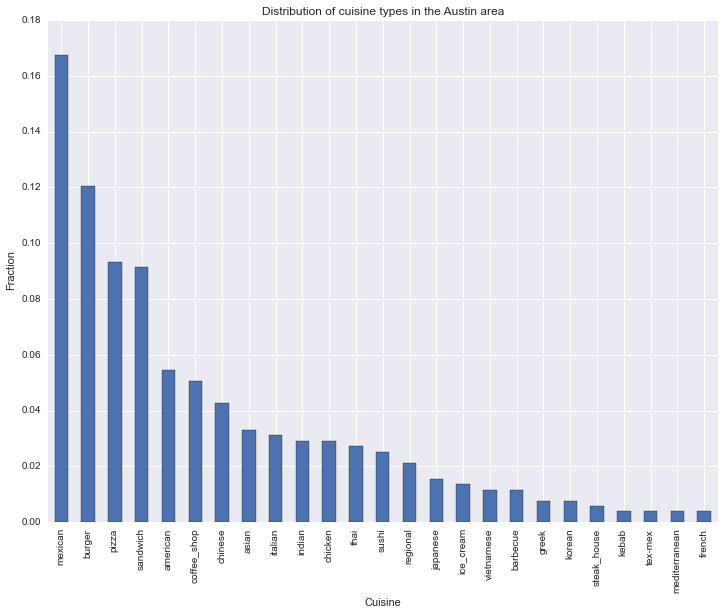

In [94]:
cuisine_df['value'].value_counts(normalize=True).head(25).plot(kind='bar')
plt.title("Distribution of cuisine types in the Austin area")
plt.xlabel("Cuisine")
plt.ylabel("Fraction")

# Conclusion

Information from an xml file can be scraped for data by Python through the xml.eTree.ElementTree module. This can be converted to a csv file which can be converted to an sql database (or to a pandas dataframe, which is not shown here, but was explored in another unit of the course). SQL databases can be converted to a pandas dataframe.

Cleaning of data takes a while. Knowledge of the nature of data also is very important so the best decisions on what to do with it can be done.


## Other References:

Automate the Boring Stuff with Python: Practical Programming for Total Beginners, A. Sweighart, No Starch Press San Francisco, CA, USA ©2015 ISBN:1593275994 9781593275990

http://stackoverflow.com/questions/19877344/near-syntax-error-when-trying-to-create-a-table-with-a-foreign-key-in-sqlit

Brandon Rhodes - Pandas From The Ground Up - PyCon 2015, https://www.youtube.com/watch?v=5JnMutdy6Fw

Udacity Data Wrangling Course (https://classroom.udacity.com/nanodegrees/nd002/parts/0021345404/modules/316820862075460/lessons/491558559/concepts/8165990800923)